In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import ast

# Results
To avoid having to run the slow command in `traffic_vis.ipynb`, it exports the dataframes to csv files.
These CSV files get read here.

In [37]:
data_slow = pd.read_csv("slow.csv")
data_no_slow = pd.read_csv("no_slow.csv")

In [38]:
data_slow

,road_length,vehicle_count,max_speed,slowdown_probability,slow_vehicle_count,slow_vehicle_max_speed,mean,std,CI_lower,CI_upper,average_speed
0,500,1,3,0.1,1,2.5,2.858333,0.371839,2.790839,2.925828,"[1.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."
1,500,1,3,0.1,2,2.5,2.875000,0.290474,2.822275,2.927725,"[1.0, 1.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.0, 3.0, ..."
2,500,1,3,0.1,3,2.5,2.888889,0.259392,2.841805,2.935972,"[1.0, 1.6666666666666667, 2.6666666666666665, ..."
3,500,1,3,0.1,4,2.5,2.879167,0.243634,2.834943,2.923390,"[1.0, 1.75, 2.75, 3.0, 3.0, 3.0, 2.75, 3.0, 2...."
4,500,1,3,0.1,5,2.5,2.880000,0.232952,2.837716,2.922284,"[1.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.8, 2.8, ..."
...,...,...,...,...,...,...,...,...,...,...,...
3995,500,10,10,0.9,6,2.5,1.694167,0.594600,1.586238,1.802096,"[0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 0.5, 0.8, 0.9, ..."
3996,500,10,10,0.9,7,2.5,1.981667,0.689805,1.856456,2.106877,"[0.3, 0.3, 0.6, 0.6, 0.8, 0.8, 0.8, 0.8, 0.9, ..."
3997,500,10,10,0.9,8,2.5,1.950833,0.548026,1.851358,2.050309,"[0.3, 0.4, 0.4, 0.4, 0.6, 0.6, 0.7, 0.7, 0.7, ..."
3998,500,10,10,0.9,9,2.5,1.663333,0.585368,1.557080,1.769587,"[0.1, 0.1, 0.2, 0.3, 0.2, 0.3, 0.4, 0.4, 0.6, ..."


T-statistic: 668.9715262211143
P-value: 0.0


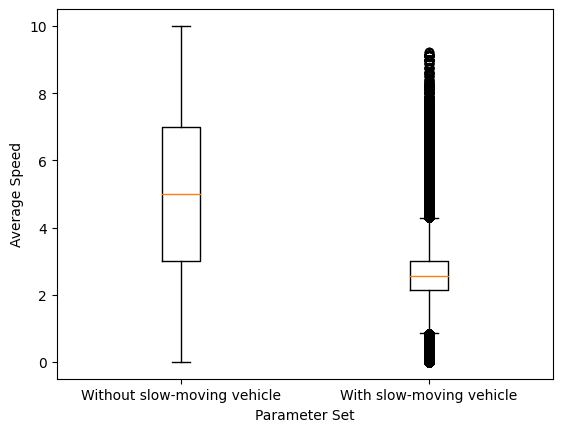

In [39]:
no_slow_speeds = [float(speed) for sublist in data_no_slow['average_speed'].apply(ast.literal_eval) for speed in sublist]
slow_speeds = [float(speed) for sublist in data_slow['average_speed'].apply(ast.literal_eval) for speed in sublist]

t_statistic, p_value = stats.ttest_ind(no_slow_speeds, slow_speeds)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

fig, ax = plt.subplots()
ax.boxplot([no_slow_speeds, slow_speeds], labels=['Without slow-moving vehicle', 'With slow-moving vehicle'])
ax.set_xlabel('Parameter Set')
ax.set_ylabel('Average Speed')
plt.show()

The model with `slow-moving` vehicles seems to have significantly more outliers than the non `slow-moving` model.
This could be due to the presence of `slow-moving` vehicles can lead to more variability
The t-statistic reaffirms this by outputting a t-statistic of `448.66486999829027` suggesting a significant difference between the average speeds of the two datasets.
And the p-value is 0.0, which is smaller than 0.05, so we can reject the null hypothesis

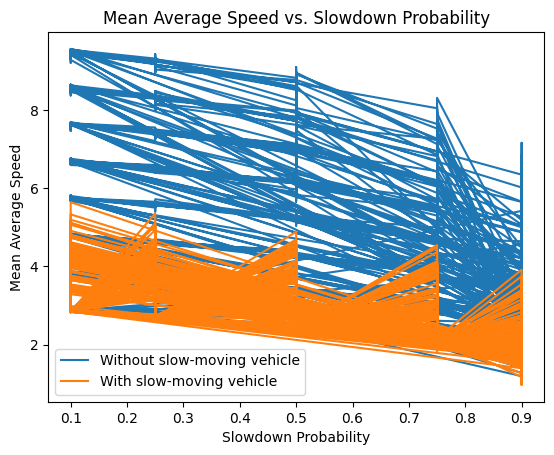

In [40]:
plt.plot(data_no_slow['slowdown_probability'], data_no_slow['mean'], label='Without slow-moving vehicle')
plt.plot(data_slow['slowdown_probability'], data_slow['mean'], label='With slow-moving vehicle')

plt.xlabel('Slowdown Probability')
plt.ylabel('Mean Average Speed')
plt.title('Mean Average Speed vs. Slowdown Probability')
plt.legend()
plt.show()

What we can see here is that `slowdown_probability` does affect the mean average speed slightly.
The graph is slight "falling" to the right indicating that increasing the `slowdown_probability` decreases the mean average speed.
Another interesting observation that could be made here is that the model without slow cars is more drastically effected by higher a `slowdown_probability` than the model with slow cars

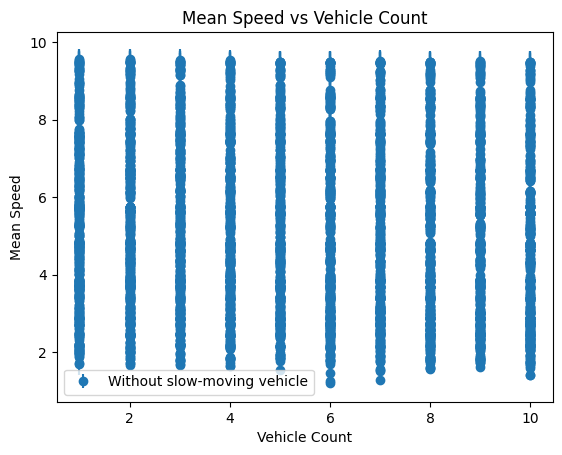

In [41]:
plt.errorbar(data_no_slow['vehicle_count'], data_no_slow['mean'], yerr=(data_no_slow['mean'] - data_no_slow['CI_lower']), fmt='o', label='Without slow-moving vehicle')
plt.xlabel('Vehicle Count')
plt.ylabel('Mean Speed')
plt.title('Mean Speed vs Vehicle Count')
plt.legend()
plt.show()

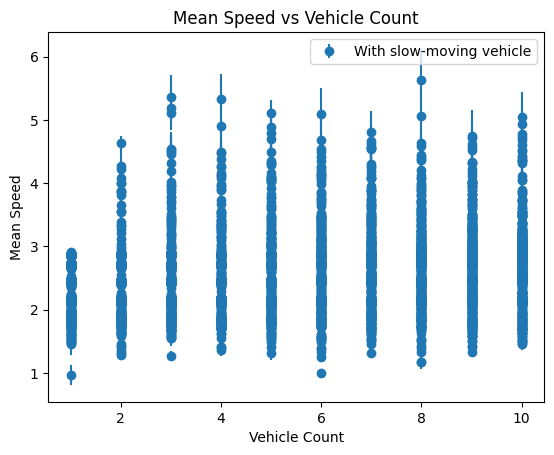

In [42]:
plt.errorbar(data_slow['vehicle_count'], data_slow['mean'], yerr=(data_slow['mean'] - data_slow['CI_lower']), fmt='o', label='With slow-moving vehicle')
plt.xlabel('Vehicle Count')
plt.ylabel('Mean Speed')
plt.title('Mean Speed vs Vehicle Count')
plt.legend()
plt.show()

These two boxplots correspond with what we found earlier, adding `slow-moving` vehicles to the model seems to result in significantly more outliers